In [1]:
import pandas as pd
import numpy as np

In [2]:
db = pd.read_csv(r"C:\Users\laksh\NIDS_Prediction\Total_CSVs\NIDS_Dataset.csv")

In [3]:
db.head()

,Unnamed: 0,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,...,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time,Benign
0,0,0,0,0,0,0,0,1,0,0,...,-1.135513,-0.178935,-0.242217,-0.237193,-0.218589,-0.159629,-0.807492,0.773925,-0.388178,Benign
1,1,0,0,0,0,0,0,1,0,0,...,-0.882221,-0.178930,-0.240318,-0.239660,-0.221809,-0.159613,-0.153837,0.146645,-0.157056,Benign
2,2,0,0,0,0,0,0,1,0,0,...,0.200209,-0.156441,0.115037,-0.217159,-0.221747,-0.159634,0.447061,-0.399077,2.175369,Benign
3,3,0,0,0,0,0,0,1,0,0,...,-0.788347,-0.178938,-0.243053,-0.241114,-0.225992,-0.159633,1.398031,0.092140,-0.112256,Benign
4,4,0,0,0,0,0,0,1,0,0,...,-0.678286,-0.178946,-0.250232,5.245053,4.540288,6.300846,-5.075614,-7.198931,-0.632209,Benign


In [4]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [5]:
db = db.iloc[:,1:46]
db = db.iloc[:,0:45]
db

,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,dest_ip_130_1_8,...,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time,Benign
0,0,0,0,0,0,0,1,0,0,0,...,-1.135513,-0.178935,-0.242217,-0.237193,-0.218589,-0.159629,-0.807492,0.773925,-0.388178,Benign
1,0,0,0,0,0,0,1,0,0,0,...,-0.882221,-0.178930,-0.240318,-0.239660,-0.221809,-0.159613,-0.153837,0.146645,-0.157056,Benign
2,0,0,0,0,0,0,1,0,0,0,...,0.200209,-0.156441,0.115037,-0.217159,-0.221747,-0.159634,0.447061,-0.399077,2.175369,Benign
3,0,0,0,0,0,0,1,0,0,0,...,-0.788347,-0.178938,-0.243053,-0.241114,-0.225992,-0.159633,1.398031,0.092140,-0.112256,Benign
4,0,0,0,0,0,0,1,0,0,0,...,-0.678286,-0.178946,-0.250232,5.245053,4.540288,6.300846,-5.075614,-7.198931,-0.632209,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269638,1,0,0,0,0,0,0,0,0,0,...,0.748533,-0.178941,-0.244679,-0.239679,-0.221606,-0.159583,-0.624305,0.650562,-0.364881,Malicious
269639,1,0,0,0,0,0,0,0,0,0,...,-1.119040,-0.178929,-0.240170,-0.238542,-0.218699,-0.159629,-1.036147,0.308279,-0.249549,Malicious
269640,1,0,0,0,0,0,0,0,0,0,...,1.888898,-0.178946,-0.250202,-0.243936,-0.226444,-0.159625,0.234809,0.157984,-0.356937,Malicious
269641,1,0,0,0,0,0,0,0,0,0,...,0.900145,-0.178939,-0.243902,-0.240051,-0.221605,-0.159626,-0.732100,0.427483,-0.298511,Malicious


In [6]:
x1 = db.iloc[:,0:45]
x1

,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,dest_ip_130_1_8,...,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time,Benign
0,0,0,0,0,0,0,1,0,0,0,...,-1.135513,-0.178935,-0.242217,-0.237193,-0.218589,-0.159629,-0.807492,0.773925,-0.388178,Benign
1,0,0,0,0,0,0,1,0,0,0,...,-0.882221,-0.178930,-0.240318,-0.239660,-0.221809,-0.159613,-0.153837,0.146645,-0.157056,Benign
2,0,0,0,0,0,0,1,0,0,0,...,0.200209,-0.156441,0.115037,-0.217159,-0.221747,-0.159634,0.447061,-0.399077,2.175369,Benign
3,0,0,0,0,0,0,1,0,0,0,...,-0.788347,-0.178938,-0.243053,-0.241114,-0.225992,-0.159633,1.398031,0.092140,-0.112256,Benign
4,0,0,0,0,0,0,1,0,0,0,...,-0.678286,-0.178946,-0.250232,5.245053,4.540288,6.300846,-5.075614,-7.198931,-0.632209,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269638,1,0,0,0,0,0,0,0,0,0,...,0.748533,-0.178941,-0.244679,-0.239679,-0.221606,-0.159583,-0.624305,0.650562,-0.364881,Malicious
269639,1,0,0,0,0,0,0,0,0,0,...,-1.119040,-0.178929,-0.240170,-0.238542,-0.218699,-0.159629,-1.036147,0.308279,-0.249549,Malicious
269640,1,0,0,0,0,0,0,0,0,0,...,1.888898,-0.178946,-0.250202,-0.243936,-0.226444,-0.159625,0.234809,0.157984,-0.356937,Malicious
269641,1,0,0,0,0,0,0,0,0,0,...,0.900145,-0.178939,-0.243902,-0.240051,-0.221605,-0.159626,-0.732100,0.427483,-0.298511,Malicious


In [7]:
x1 = db.iloc[:,0:44]
y1 = db.iloc[:,44]
x1

,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,dest_ip_130_1_8,...,s_mode_time,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time
0,0,0,0,0,0,0,1,0,0,0,...,1.562871,-1.135513,-0.178935,-0.242217,-0.237193,-0.218589,-0.159629,-0.807492,0.773925,-0.388178
1,0,0,0,0,0,0,1,0,0,0,...,-2.909475,-0.882221,-0.178930,-0.240318,-0.239660,-0.221809,-0.159613,-0.153837,0.146645,-0.157056
2,0,0,0,0,0,0,1,0,0,0,...,-0.381118,0.200209,-0.156441,0.115037,-0.217159,-0.221747,-0.159634,0.447061,-0.399077,2.175369
3,0,0,0,0,0,0,1,0,0,0,...,0.617898,-0.788347,-0.178938,-0.243053,-0.241114,-0.225992,-0.159633,1.398031,0.092140,-0.112256
4,0,0,0,0,0,0,1,0,0,0,...,0.428250,-0.678286,-0.178946,-0.250232,5.245053,4.540288,6.300846,-5.075614,-7.198931,-0.632209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269638,1,0,0,0,0,0,0,0,0,0,...,-0.616616,0.748533,-0.178941,-0.244679,-0.239679,-0.221606,-0.159583,-0.624305,0.650562,-0.364881
269639,1,0,0,0,0,0,0,0,0,0,...,1.499615,-1.119040,-0.178929,-0.240170,-0.238542,-0.218699,-0.159629,-1.036147,0.308279,-0.249549
269640,1,0,0,0,0,0,0,0,0,0,...,-0.889490,1.888898,-0.178946,-0.250202,-0.243936,-0.226444,-0.159625,0.234809,0.157984,-0.356937
269641,1,0,0,0,0,0,0,0,0,0,...,-0.665595,0.900145,-0.178939,-0.243902,-0.240051,-0.221605,-0.159626,-0.732100,0.427483,-0.298511


In [8]:
np.isnan(x1).any()

ip_1                    False
ip_144                  False
ip_204                  False
ip_205                  False
ip_207                  False
ip_8                    False
not_freq                False
ip_4                    False
ip_11                   False
dest_ip_130_1_8         False
not_dest_freq           False
Wrong_port              False
port_is_443             False
Wrong_port.1            False
destination_port_443    False
Duration                False
fs_1807                 False
fs_more                 False
fsless                  False
FlowSentRate            False
FlowRecvRate            False
Pcket_lenVar            False
Length_std              False
Length_mean             False
L_median                False
L_mode                  False
s_median                False
s_mode                  False
PLCV                    False
PTV                     False
PT_std                  False
PT_mean                 False
PT_median               False
Packt_Time

In [9]:
y1.head()

0    Benign
1    Benign
2    Benign
3    Benign
4    Benign
Name: Benign, dtype: object

In [10]:
from collections import Counter

print(Counter(y1))

Counter({'Malicious': 249836, 'Benign': 19807})


In [11]:
c_class_0, c_class_1 = db.Benign.value_counts()
c_class_0, c_class_1 = db.Benign.value_counts()

In [12]:
print(c_class_0)
print(c_class_1)

249836
19807


In [13]:
df_c_0 = db[db['Benign'] == 'Malicious']
df_c_1 = db[db['Benign'] == 'Benign']

In [14]:
df_c_0_under = df_c_0.sample(c_class_1)

In [15]:
df_under = pd.concat([df_c_0_under, df_c_1], axis=0)

In [16]:
print(df_under.Benign.value_counts())

Malicious    19807
Benign       19807
Name: Benign, dtype: int64


In [17]:
df_Totoal = df_under

In [18]:
df_Totoal.head()

,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,dest_ip_130_1_8,...,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time,Benign
34251,0,0,0,0,0,0,1,0,1,0,...,-0.891074,-0.178946,-0.250140,5.249324,4.543993,6.305803,0.435598,0.478667,-0.632205,Malicious
144930,0,0,0,0,0,0,1,0,0,0,...,1.041159,-0.178940,-0.243982,-0.240562,-0.221609,-0.159633,-1.038924,0.316350,-0.253103,Malicious
45541,0,0,0,0,0,0,1,0,1,0,...,-0.720775,-0.178946,-0.250192,-0.238491,-0.221714,-0.153225,0.100868,0.311531,-0.630722,Malicious
109982,0,0,0,0,0,0,1,0,1,0,...,0.967755,-0.178935,-0.242028,-0.239517,-0.221624,-0.159622,-0.265925,0.311677,-0.251683,Malicious
212386,0,0,1,0,0,0,0,1,0,0,...,-1.045802,-0.178929,-0.240223,-0.238477,-0.218812,-0.159633,-0.972193,0.323036,-0.256066,Malicious


In [19]:
x = df_Totoal.iloc[:,0:44]
y = df_Totoal.iloc[:,44]

In [20]:
np.isnan(x).any()

ip_1                    False
ip_144                  False
ip_204                  False
ip_205                  False
ip_207                  False
ip_8                    False
not_freq                False
ip_4                    False
ip_11                   False
dest_ip_130_1_8         False
not_dest_freq           False
Wrong_port              False
port_is_443             False
Wrong_port.1            False
destination_port_443    False
Duration                False
fs_1807                 False
fs_more                 False
fsless                  False
FlowSentRate            False
FlowRecvRate            False
Pcket_lenVar            False
Length_std              False
Length_mean             False
L_median                False
L_mode                  False
s_median                False
s_mode                  False
PLCV                    False
PTV                     False
PT_std                  False
PT_mean                 False
PT_median               False
Packt_Time

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [22]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [23]:
x_train.shape

(31691, 44)

In [24]:
cvscores = []
i=0
for train, test in kfold.split(x_train, y_train):
    cnn = Sequential()
    cnn.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(44,1)))
    cnn.add(MaxPooling1D(pool_size=(2)))
    cnn.add(Flatten())
    cnn.add(Dense(128, activation="relu"))
    cnn.add(Dropout(0.5))
    cnn.add(Dense(2, activation="sigmoid"))
    # define optimizer and objective, compile cnn


    cnn.compile(loss="binary_crossentropy", optimizer="Adagrad",metrics=['accuracy'])
    
    
    x_tn = x_train.iloc[train]
    y_tn = y_train.iloc[train]
    y_tn = pd.get_dummies(y_tn)
    x_ts = x_train.iloc[test]
    y_ts = y_train.iloc[test]
    y_ts = pd.get_dummies(y_ts)
    
    x_tn1 = x_tn.to_numpy()
    x_tn1 = np.reshape(x_tn1, (x_tn1.shape[0],x_tn1.shape[1],1))
    
    
    x_ts1 = x_ts.to_numpy()
    x_ts1 = np.reshape(x_ts1, (x_ts1.shape[0],x_ts1.shape[1],1))
    
    cnn.fit(x_tn1, y_tn, epochs=65,batch_size=64,verbose=1)
    scores = cnn.evaluate(x_ts1, y_ts, verbose=1)
    print(str(i)+"th Fold :")
    print("%s: %.2f%%" % (cnn.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    i = i+1
    print("------------------------------------------------------------------")


print("Average validation accuracy : ")   
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Epoch 1/65
446/446 [==============================] - 8s 13ms/step - loss: 0.6816 - accuracy: 0.6128
Epoch 2/65
446/446 [==============================] - 6s 13ms/step - loss: 0.6566 - accuracy: 0.7258
Epoch 3/65
446/446 [==============================] - 5s 11ms/step - loss: 0.6272 - accuracy: 0.7913
Epoch 4/65
446/446 [==============================] - 4s 10ms/step - loss: 0.5909 - accuracy: 0.8295
Epoch 5/65
446/446 [==============================] - 4s 10ms/step - loss: 0.5476 - accuracy: 0.8560
Epoch 6/65
446/446 [==============================] - 5s 10ms/step - loss: 0.5010 - accuracy: 0.8722
Epoch 7/65
446/446 [==============================] - 5s 11ms/step - loss: 0.4552 - accuracy: 0.8855
Epoch 8/65
446/446 [==============================] - 4s 10ms/step - loss: 0.4133 - accuracy: 0.8925
Epoch 9/65
446/446 [==============================] - 3s 8ms/step - loss: 0.3799 - accuracy: 0.8941
Epoch 10/65
446/446 [==============================] - 3s 8ms/step - loss: 0.3500 - accuracy

446/446 [==============================] - 5s 11ms/step - loss: 0.2612 - accuracy: 0.9143
Epoch 16/65
446/446 [==============================] - 5s 11ms/step - loss: 0.2530 - accuracy: 0.9177
Epoch 17/65
446/446 [==============================] - 6s 12ms/step - loss: 0.2438 - accuracy: 0.9205
Epoch 18/65
446/446 [==============================] - 5s 12ms/step - loss: 0.2377 - accuracy: 0.9221
Epoch 19/65
446/446 [==============================] - 6s 13ms/step - loss: 0.2329 - accuracy: 0.9236
Epoch 20/65
446/446 [==============================] - 6s 12ms/step - loss: 0.2275 - accuracy: 0.9253
Epoch 21/65
446/446 [==============================] - 6s 13ms/step - loss: 0.2229 - accuracy: 0.9255
Epoch 22/65
446/446 [==============================] - 6s 14ms/step - loss: 0.2169 - accuracy: 0.9276
Epoch 23/65
446/446 [==============================] - 6s 14ms/step - loss: 0.2162 - accuracy: 0.9273
Epoch 24/65
446/446 [==============================] - 5s 11ms/step - loss: 0.2139 - accuracy:

446/446 [==============================] - 3s 8ms/step - loss: 0.2019 - accuracy: 0.9307
Epoch 30/65
446/446 [==============================] - 3s 8ms/step - loss: 0.1995 - accuracy: 0.9301
Epoch 31/65
446/446 [==============================] - 3s 7ms/step - loss: 0.1983 - accuracy: 0.9316
Epoch 32/65
446/446 [==============================] - 3s 7ms/step - loss: 0.1950 - accuracy: 0.9323
Epoch 33/65
446/446 [==============================] - 3s 7ms/step - loss: 0.1948 - accuracy: 0.9323
Epoch 34/65
446/446 [==============================] - 3s 8ms/step - loss: 0.1927 - accuracy: 0.9328
Epoch 35/65
446/446 [==============================] - 4s 8ms/step - loss: 0.1905 - accuracy: 0.9326
Epoch 36/65
446/446 [==============================] - 3s 7ms/step - loss: 0.1882 - accuracy: 0.9334
Epoch 37/65
446/446 [==============================] - 3s 8ms/step - loss: 0.1872 - accuracy: 0.9343
Epoch 38/65
446/446 [==============================] - 3s 8ms/step - loss: 0.1863 - accuracy: 0.9352
Ep

446/446 [==============================] - 4s 8ms/step - loss: 0.1822 - accuracy: 0.9354
Epoch 44/65
446/446 [==============================] - 3s 8ms/step - loss: 0.1800 - accuracy: 0.9375
Epoch 45/65
446/446 [==============================] - 3s 6ms/step - loss: 0.1796 - accuracy: 0.9373
Epoch 46/65
446/446 [==============================] - 3s 7ms/step - loss: 0.1788 - accuracy: 0.9376
Epoch 47/65
446/446 [==============================] - 3s 8ms/step - loss: 0.1768 - accuracy: 0.9382
Epoch 48/65
446/446 [==============================] - 3s 8ms/step - loss: 0.1764 - accuracy: 0.9387
Epoch 49/65
446/446 [==============================] - 4s 8ms/step - loss: 0.1755 - accuracy: 0.9388
Epoch 50/65
446/446 [==============================] - 4s 10ms/step - loss: 0.1732 - accuracy: 0.9399
Epoch 51/65
446/446 [==============================] - 4s 9ms/step - loss: 0.1726 - accuracy: 0.9393
Epoch 52/65
446/446 [==============================] - 4s 9ms/step - loss: 0.1710 - accuracy: 0.9403
E

446/446 [==============================] - 3s 7ms/step - loss: 0.1693 - accuracy: 0.9418
Epoch 58/65
446/446 [==============================] - 3s 8ms/step - loss: 0.1669 - accuracy: 0.9413
Epoch 59/65
446/446 [==============================] - 4s 9ms/step - loss: 0.1665 - accuracy: 0.9413
Epoch 60/65
446/446 [==============================] - 4s 8ms/step - loss: 0.1665 - accuracy: 0.9417
Epoch 61/65
446/446 [==============================] - 4s 8ms/step - loss: 0.1660 - accuracy: 0.9420
Epoch 62/65
446/446 [==============================] - 3s 8ms/step - loss: 0.1654 - accuracy: 0.9427
Epoch 63/65
446/446 [==============================] - 3s 8ms/step - loss: 0.1641 - accuracy: 0.9419
Epoch 64/65
446/446 [==============================] - 3s 8ms/step - loss: 0.1634 - accuracy: 0.9431
Epoch 65/65
100/100 [==============================] - 1s 5ms/step - loss: 0.1585 - accuracy: 0.9441
4th Fold :
accuracy: 94.41%
------------------------------------------------------------------
Epoch 1/

446/446 [==============================] - 3s 8ms/step - loss: 0.5580 - accuracy: 0.8437
Epoch 5/65
446/446 [==============================] - 3s 8ms/step - loss: 0.5045 - accuracy: 0.8622
Epoch 6/65
446/446 [==============================] - 3s 6ms/step - loss: 0.4542 - accuracy: 0.8764
Epoch 7/65
446/446 [==============================] - 3s 7ms/step - loss: 0.4120 - accuracy: 0.8838
Epoch 8/65
446/446 [==============================] - 4s 9ms/step - loss: 0.3771 - accuracy: 0.8894
Epoch 9/65
446/446 [==============================] - 6s 14ms/step - loss: 0.3494 - accuracy: 0.8935
Epoch 10/65
446/446 [==============================] - 5s 12ms/step - loss: 0.3283 - accuracy: 0.8944
Epoch 11/65
446/446 [==============================] - 4s 10ms/step - loss: 0.3060 - accuracy: 0.8992
Epoch 12/65
446/446 [==============================] - 4s 9ms/step - loss: 0.2927 - accuracy: 0.9011
Epoch 13/65
446/446 [==============================] - 4s 8ms/step - loss: 0.2801 - accuracy: 0.9038
Epoc

446/446 [==============================] - 4s 8ms/step - loss: 0.2290 - accuracy: 0.9209
Epoch 19/65
446/446 [==============================] - 4s 9ms/step - loss: 0.2259 - accuracy: 0.9232
Epoch 20/65
446/446 [==============================] - 4s 9ms/step - loss: 0.2214 - accuracy: 0.9242
Epoch 21/65
446/446 [==============================] - 5s 10ms/step - loss: 0.2194 - accuracy: 0.9256
Epoch 22/65
446/446 [==============================] - 4s 9ms/step - loss: 0.2131 - accuracy: 0.9270
Epoch 23/65
446/446 [==============================] - 4s 9ms/step - loss: 0.2125 - accuracy: 0.9273
Epoch 24/65
446/446 [==============================] - 5s 12ms/step - loss: 0.2090 - accuracy: 0.9283
Epoch 25/65
446/446 [==============================] - 4s 9ms/step - loss: 0.2042 - accuracy: 0.9287
Epoch 26/65
446/446 [==============================] - 4s 8ms/step - loss: 0.2029 - accuracy: 0.9294
Epoch 27/65
446/446 [==============================] - 3s 7ms/step - loss: 0.1997 - accuracy: 0.9303


446/446 [==============================] - 5s 11ms/step - loss: 0.1989 - accuracy: 0.9312
Epoch 33/65
446/446 [==============================] - 5s 11ms/step - loss: 0.1964 - accuracy: 0.9316
Epoch 34/65
446/446 [==============================] - 4s 10ms/step - loss: 0.1955 - accuracy: 0.9310
Epoch 35/65
446/446 [==============================] - 4s 9ms/step - loss: 0.1916 - accuracy: 0.9318
Epoch 36/65
446/446 [==============================] - 4s 9ms/step - loss: 0.1907 - accuracy: 0.9330
Epoch 37/65
446/446 [==============================] - 4s 9ms/step - loss: 0.1908 - accuracy: 0.9335
Epoch 38/65
446/446 [==============================] - 4s 9ms/step - loss: 0.1864 - accuracy: 0.9345
Epoch 39/65
446/446 [==============================] - 4s 9ms/step - loss: 0.1862 - accuracy: 0.9333
Epoch 40/65
446/446 [==============================] - 4s 9ms/step - loss: 0.1870 - accuracy: 0.9344
Epoch 41/65
446/446 [==============================] - 4s 9ms/step - loss: 0.1847 - accuracy: 0.9349

446/446 [==============================] - 4s 9ms/step - loss: 0.1774 - accuracy: 0.9379
Epoch 47/65
446/446 [==============================] - 4s 8ms/step - loss: 0.1764 - accuracy: 0.9385
Epoch 48/65
446/446 [==============================] - 4s 8ms/step - loss: 0.1761 - accuracy: 0.9377
Epoch 49/65
446/446 [==============================] - 4s 8ms/step - loss: 0.1742 - accuracy: 0.9379
Epoch 50/65
446/446 [==============================] - 4s 9ms/step - loss: 0.1747 - accuracy: 0.9384
Epoch 51/65
446/446 [==============================] - 5s 10ms/step - loss: 0.1718 - accuracy: 0.9385
Epoch 52/65
446/446 [==============================] - 4s 8ms/step - loss: 0.1708 - accuracy: 0.9395
Epoch 53/65
446/446 [==============================] - 4s 8ms/step - loss: 0.1710 - accuracy: 0.9403
Epoch 54/65
446/446 [==============================] - 3s 7ms/step - loss: 0.1698 - accuracy: 0.9398
Epoch 55/65
446/446 [==============================] - 3s 7ms/step - loss: 0.1688 - accuracy: 0.9407
E

In [25]:
x_tr = x_train.to_numpy()
x_tr = np.reshape(x_tr, (x_tr.shape[0], x_tr.shape[1],1))

In [26]:
x_ts = x_test.to_numpy()
x_ts = np.reshape(x_ts, (x_ts.shape[0], x_ts.shape[1],1))

In [27]:
y_tr = pd.get_dummies(y_train)
y_ts = pd.get_dummies(y_test)

In [28]:
_, train_acc = cnn.evaluate(x_tr, y_tr, verbose=1)
_, test_acc = cnn.evaluate(x_ts, y_ts, verbose=1)

248/248 [==============================] - 1s 4ms/step - loss: 0.1504 - accuracy: 0.9485


In [29]:
print("Training accuracy: "+str(train_acc*100))
print("Test accuracy: "+str(test_acc*100))

Training accuracy: 94.68618631362915
Test accuracy: 94.85043287277222


In [30]:
y_probs = cnn.predict(x_ts, verbose=1).ravel()
#y_classes = cnn.predict_classes(x_ts, verbose=1)
#y_classes = (cnn.predict(x_ts) > 0.5).astype("int32")
y_classes = np.argmax(cnn.predict(x_ts), axis=-1)

248/248 [==============================] - 1s 4ms/step


In [31]:
y_pred = pd.get_dummies(y_classes)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_ts,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3926
           1       0.95      0.95      0.95      3997

   micro avg       0.95      0.95      0.95      7923
   macro avg       0.95      0.95      0.95      7923
weighted avg       0.95      0.95      0.95      7923
 samples avg       0.95      0.95      0.95      7923



In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
y_test_le = le.fit_transform(y_test)

In [35]:
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test_le, y_classes)

In [36]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

In [37]:
from matplotlib import pyplot

In [38]:
print(auc_keras)

0.948520579176104


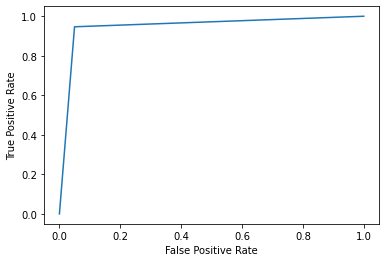

In [39]:
pyplot.plot(fpr_keras, tpr_keras)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()